In [2]:
import os
import pandas as pd

In [22]:
pheno = pd.read_csv("12032023_Sask_WGS_Data _2017-2022_Pheno_AMR.csv", sep="\t")
geno = pd.read_csv("11262023_NG_2017-2022_Genotypic_Resistance.csv", sep="\t")

In [23]:
pheno.columns = pheno.columns.str.replace("Classification", "Pheno")

In [24]:
geno.columns = [f"{col}_Geno" for col in geno.columns]

In [25]:
geno.head()

,Sample_Geno,Azithromycin_Geno,Ceftriaxone_Geno,Cefixime_Geno,Ciprofloxacin_Geno,Penicillin_Geno,Sulfanomides_Geno,Spectinomycin_Geno,Tetracycline_Geno
0,NG-1-2017,S,S,R,R,R,R,S,R
1,NG-10-2017,S,S,S,S,I,R,S,I
2,NG-10-2018,S,S,S,S,I,R,S,R
3,NG-100-2018,S,S,S,S,I,R,S,R
4,NG-101-2018,S,S,S,S,I,R,S,R


In [26]:
pheno.head()

,NCBI-NAME,Penicillin_Pheno,Spectinomycin_Pheno,Tetracycline_Pheno,Erythromycin_Pheno,Ceftriaxone_Pheno,Ciprofloxacin_Pheno,Cefixime_Pheno,Azithromycin_Pheno,Gentamicin_Pheno,Ertapenem_Pheno,BetaNLactamase
0,NG-1-2018,I,S,R,S,S,S,S,S,I,S,N
1,NG-2-2018,I,S,R,S,S,S,S,S,I,S,N
2,NG-3-2018,I,S,I,S,S,R,S,S,I,S,N
3,NG-4-2018,I,S,I,S,S,R,S,S,I,S,N
4,NG-5-2018,R,S,R,R,S,R,S,S,I,S,N


In [27]:
geno.rename(columns={'Sample_Geno': 'NCBI-NAME'}, inplace=True)

In [31]:
geno

,NCBI-NAME,Azithromycin_Geno,Ceftriaxone_Geno,Cefixime_Geno,Ciprofloxacin_Geno,Penicillin_Geno,Sulfanomides_Geno,Spectinomycin_Geno,Tetracycline_Geno
0,NG-1-2017,S,S,R,R,R,R,S,R
1,NG-10-2017,S,S,S,S,I,R,S,I
2,NG-10-2018,S,S,S,S,I,R,S,R
3,NG-100-2018,S,S,S,S,I,R,S,R
4,NG-101-2018,S,S,S,S,I,R,S,R
...,...,...,...,...,...,...,...,...,...
422,NG-95-2018,S,S,S,S,I,R,S,I
423,NG-96-2018,S,S,S,S,I,R,S,R
424,NG-97-2018,S,S,S,S,I,R,S,I
425,NG-98-2018,S,S,S,S,I,R,S,R


In [29]:
merged_table = pd.merge(geno, pheno, on='NCBI-NAME', how='left')

In [34]:
merged_table['Year'] = merged_table['NCBI-NAME'].str.extract(r'(\d{4})')

In [35]:
merged_table.to_csv("12032023_NG_2017-2022_Geno_Pheno_AMR.csv")

In [36]:
merged_table.head()

,NCBI-NAME,Azithromycin_Geno,Ceftriaxone_Geno,Cefixime_Geno,Ciprofloxacin_Geno,Penicillin_Geno,Sulfanomides_Geno,Spectinomycin_Geno,Tetracycline_Geno,Penicillin_Pheno,...,Tetracycline_Pheno,Erythromycin_Pheno,Ceftriaxone_Pheno,Ciprofloxacin_Pheno,Cefixime_Pheno,Azithromycin_Pheno,Gentamicin_Pheno,Ertapenem_Pheno,BetaNLactamase,Year
0,NG-1-2017,S,S,R,R,R,R,S,R,I,...,R,NaN,S,R,S,S,NaN,NaN,N,2017
1,NG-10-2017,S,S,S,S,I,R,S,I,I,...,R,NaN,S,S,S,S,NaN,NaN,N,2017
2,NG-10-2018,S,S,S,S,I,R,S,R,I,...,R,S,S,S,S,S,I,S,N,2018
3,NG-100-2018,S,S,S,S,I,R,S,R,I,...,R,S,S,S,S,S,I,S,N,2018
4,NG-101-2018,S,S,S,S,I,R,S,R,I,...,R,S,S,S,S,S,I,S,N,2018


In [37]:
count_rows_with_R = len(merged_table[(merged_table['Azithromycin_Geno'] == 'R') & (merged_table['Azithromycin_Pheno'] == 'R')])

print(f"Number of rows with 'R' in both Column1 and Column2: {count_rows_with_R}")

Number of rows with 'R' in both Column1 and Column2: 8


In [38]:
condition = ((merged_table['Azithromycin_Geno'] == 'R') & ((merged_table['Azithromycin_Pheno'] == 'S') | (merged_table['Azithromycin_Pheno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 42


In [39]:
condition = ((merged_table['Azithromycin_Pheno'] == 'R') & ((merged_table['Azithromycin_Geno'] == 'S') | (merged_table['Azithromycin_Geno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 1


In [42]:
condition = ((merged_table['Azithromycin_Geno'] == 'S') | (merged_table['Azithromycin_Geno'] == 'I') & ((merged_table['Azithromycin_Pheno'] == 'S') | (merged_table['Azithromycin_Pheno'] == 'I')))

count_rows_with_S_or_I_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_S_or_I_and_S_or_I}")

Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 377


In [44]:
count_rows_with_R = len(merged_table[(merged_table['Ceftriaxone_Geno'] == 'R') & (merged_table['Ceftriaxone_Pheno'] == 'R')])

print(f"Number of rows with 'R' in both Column1 and Column2: {count_rows_with_R}")

condition = ((merged_table['Ceftriaxone_Geno'] == 'R') & ((merged_table['Ceftriaxone_Pheno'] == 'S') | (merged_table['Ceftriaxone_Pheno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Ceftriaxone_Pheno'] == 'R') & ((merged_table['Ceftriaxone_Geno'] == 'S') | (merged_table['Ceftriaxone_Geno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Ceftriaxone_Geno'] == 'S') | (merged_table['Ceftriaxone_Geno'] == 'I') & ((merged_table['Ceftriaxone_Pheno'] == 'S') | (merged_table['Ceftriaxone_Pheno'] == 'I')))

count_rows_with_S_or_I_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_S_or_I_and_S_or_I}")


Number of rows with 'R' in both Column1 and Column2: 0
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 0
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 0
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 427


In [45]:
count_rows_with_R = len(merged_table[(merged_table['Cefixime_Geno'] == 'R') & (merged_table['Cefixime_Pheno'] == 'R')])

print(f"Number of rows with 'R' in both Column1 and Column2: {count_rows_with_R}")

condition = ((merged_table['Cefixime_Geno'] == 'R') & ((merged_table['Cefixime_Pheno'] == 'S') | (merged_table['Cefixime_Pheno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Cefixime_Pheno'] == 'R') & ((merged_table['Cefixime_Geno'] == 'S') | (merged_table['Cefixime_Geno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Cefixime_Geno'] == 'S') | (merged_table['Cefixime_Geno'] == 'I') & ((merged_table['Cefixime_Pheno'] == 'S') | (merged_table['Cefixime_Pheno'] == 'I')))

count_rows_with_S_or_I_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_S_or_I_and_S_or_I}")

Number of rows with 'R' in both Column1 and Column2: 0
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 81
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 0
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 346


In [46]:
count_rows_with_R = len(merged_table[(merged_table['Ciprofloxacin_Geno'] == 'R') & (merged_table['Ciprofloxacin_Pheno'] == 'R')])

print(f"Number of rows with 'R' in both Column1 and Column2: {count_rows_with_R}")

condition = ((merged_table['Ciprofloxacin_Geno'] == 'R') & ((merged_table['Ciprofloxacin_Pheno'] == 'S') | (merged_table['Ciprofloxacin_Pheno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Ciprofloxacin_Pheno'] == 'R') & ((merged_table['Ciprofloxacin_Geno'] == 'S') | (merged_table['Ciprofloxacin_Geno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Ciprofloxacin_Geno'] == 'S') | (merged_table['Ciprofloxacin_Geno'] == 'I') & ((merged_table['Ciprofloxacin_Pheno'] == 'S') | (merged_table['Ciprofloxacin_Pheno'] == 'I')))

count_rows_with_S_or_I_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_S_or_I_and_S_or_I}")

Number of rows with 'R' in both Column1 and Column2: 128
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 7
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 2
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 292


In [47]:
count_rows_with_R = len(merged_table[(merged_table['Penicillin_Geno'] == 'R') & (merged_table['Penicillin_Pheno'] == 'R')])

print(f"Number of rows with 'R' in both Column1 and Column2: {count_rows_with_R}")

condition = ((merged_table['Penicillin_Geno'] == 'R') & ((merged_table['Penicillin_Pheno'] == 'S') | (merged_table['Penicillin_Pheno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Penicillin_Pheno'] == 'R') & ((merged_table['Penicillin_Geno'] == 'S') | (merged_table['Penicillin_Geno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Penicillin_Geno'] == 'S') | (merged_table['Penicillin_Geno'] == 'I') & ((merged_table['Penicillin_Pheno'] == 'S') | (merged_table['Penicillin_Pheno'] == 'I')))

count_rows_with_S_or_I_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_S_or_I_and_S_or_I}")

Number of rows with 'R' in both Column1 and Column2: 22
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 43
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 5
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 355


In [48]:
count_rows_with_R = len(merged_table[(merged_table['Tetracycline_Geno'] == 'R') & (merged_table['Tetracycline_Pheno'] == 'R')])

print(f"Number of rows with 'R' in both Column1 and Column2: {count_rows_with_R}")

condition = ((merged_table['Tetracycline_Geno'] == 'R') & ((merged_table['Tetracycline_Pheno'] == 'S') | (merged_table['Tetracycline_Pheno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Tetracycline_Pheno'] == 'R') & ((merged_table['Tetracycline_Geno'] == 'S') | (merged_table['Tetracycline_Geno'] == 'I')))

count_rows_with_R_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table['Tetracycline_Geno'] == 'S') | (merged_table['Tetracycline_Geno'] == 'I') & ((merged_table['Tetracycline_Pheno'] == 'S') | (merged_table['Tetracycline_Pheno'] == 'I')))

count_rows_with_S_or_I_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_S_or_I_and_S_or_I}")

Number of rows with 'R' in both Column1 and Column2: 182
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 18
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 79
Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: 146


In [49]:
merged_table_spect = merged_table[merged_table['Year'] != '2017']

In [52]:
count_rows_with_R = len(merged_table_spect[(merged_table_spect['Spectinomycin_Geno'] == 'R') & (merged_table_spect['Spectinomycin_Pheno'] == 'R')])

print(f"Number of rows with 'R' in both Column1 and Column2: {count_rows_with_R}")

#condition = ((merged_table_spect['Spectinomycin_Geno'] == 'R') & ((merged_table_spect['Spectinomycin_Pheno'] == 'S') | (merged_table_spect['Spectinomycin_Pheno'] == 'I')))

#count_rows_with_R_and_S_or_I = len(merged_table[condition])

#print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

#condition = ((merged_table_spect['Spectinomycin_Pheno'] == 'R') & ((merged_table_spect['Spectinomycin_Geno'] == 'S') | (merged_table_spect['Spectinomycin_Geno'] == 'I')))

#count_rows_with_R_and_S_or_I = len(merged_table[condition])

#print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_R_and_S_or_I}")

condition = ((merged_table_spect['Spectinomycin_Geno'] == 'S') | (merged_table_spect['Spectinomycin_Geno'] == 'I') & ((merged_table_spect['Spectinomycin_Pheno'] == 'S') | (merged_table_spect['Spectinomycin_Pheno'] == 'I')))

count_rows_with_S_or_I_and_S_or_I = len(merged_table[condition])

print(f"Number of rows with 'R' in Column1 and 'S' or 'I' in Column2: {count_rows_with_S_or_I_and_S_or_I}")

Number of rows with 'R' in both Column1 and Column2: 0


/tmp/ipykernel_12225/674820338.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_rows_with_S_or_I_and_S_or_I = len(merged_table[condition])


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [55]:
data_columns = merged_table.columns.difference(['Year'])

# Create a dictionary to store the results for each column
grouped_counts_dict = {}

# Iterate over columns and count unique values for each year
for column in data_columns:
    grouped_counts_dict[column] = merged_table.groupby(['Year', column]).size().unstack().fillna(0).astype(int)

# Display the grouped counts for each column
for column, counts in grouped_counts_dict.items():
    print(f"\nCounts for {column}:\n{counts}")


Counts for Azithromycin_Geno:
Azithromycin_Geno   R    S
Year                      
2017                0   78
2018                2  112
2019               17  102
2020                4   43
2021               14   27
2022               13   15

Counts for Azithromycin_Pheno:
Azithromycin_Pheno  R    S
Year                      
2017                1   75
2018                1  113
2019                3  116
2020                0   47
2021                3   38
2022                1   27

Counts for BetaNLactamase:
BetaNLactamase    N  P
Year                  
2017             78  0
2018            111  3
2019            117  2
2020             47  0
2021             41  0
2022             27  1

Counts for Cefixime_Geno:
Cefixime_Geno   R   S
Year                 
2017           25  53
2018           18  96
2019           20  99
2020            9  38
2021            6  35
2022            3  25

Counts for Cefixime_Pheno:
Cefixime_Pheno    S
Year               
2017             76
20

In [56]:
merged_table.head()

,NCBI-NAME,Azithromycin_Geno,Ceftriaxone_Geno,Cefixime_Geno,Ciprofloxacin_Geno,Penicillin_Geno,Sulfanomides_Geno,Spectinomycin_Geno,Tetracycline_Geno,Penicillin_Pheno,...,Tetracycline_Pheno,Erythromycin_Pheno,Ceftriaxone_Pheno,Ciprofloxacin_Pheno,Cefixime_Pheno,Azithromycin_Pheno,Gentamicin_Pheno,Ertapenem_Pheno,BetaNLactamase,Year
0,NG-1-2017,S,S,R,R,R,R,S,R,I,...,R,NaN,S,R,S,S,NaN,NaN,N,2017
1,NG-10-2017,S,S,S,S,I,R,S,I,I,...,R,NaN,S,S,S,S,NaN,NaN,N,2017
2,NG-10-2018,S,S,S,S,I,R,S,R,I,...,R,S,S,S,S,S,I,S,N,2018
3,NG-100-2018,S,S,S,S,I,R,S,R,I,...,R,S,S,S,S,S,I,S,N,2018
4,NG-101-2018,S,S,S,S,I,R,S,R,I,...,R,S,S,S,S,S,I,S,N,2018


In [59]:
YAziG=pd.crosstab(merged_table['Azithromycin_Geno'], merged_table['Year'])
YAziP=pd.crosstab(merged_table['Azithromycin_Pheno'], merged_table['Year'])
YbetaP=pd.crosstab(merged_table['BetaNLactamase'], merged_table['Year'])
YcefG=pd.crosstab(merged_table['Cefixime_Geno'], merged_table['Year'])
YciproG=pd.crosstab(merged_table['Ciprofloxacin_Geno'], merged_table['Year'])
YciproP=pd.crosstab(merged_table['Ciprofloxacin_Pheno'], merged_table['Year'])
YeryP=pd.crosstab(merged_table['Erythromycin_Pheno'], merged_table['Year'])
YpenG=pd.crosstab(merged_table['Penicillin_Geno'], merged_table['Year'])
YpenP=pd.crosstab(merged_table['Penicillin_Pheno'], merged_table['Year'])
YsulG=pd.crosstab(merged_table['Sulfanomides_Geno'], merged_table['Year'])
YtetG=pd.crosstab(merged_table['Tetracycline_Geno'], merged_table['Year'])
YtetP=pd.crosstab(merged_table['Tetracycline_Pheno'], merged_table['Year'])




In [60]:
YAziG

Year,2017,2018,2019,2020,2021,2022
Azithromycin_Geno,,,,,,
R,0,2,17,4,14,13
S,78,112,102,43,27,15


In [67]:
import pandas as pd

# Assuming 'your_table_list' is a list containing your DataFrames
# Replace it with the actual list of your DataFrames
your_table_list = [YAziG, YAziP, YcefG, YciproG, YciproP, YpenG, YpenP, YsulG, YtetG, YtetP]  # Read your CSV files or use your existing DataFrames

# Define the year columns and their divisors
year_columns = ['2017', '2018', '2019', '2020', '2021', '2022']
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, '2022': 28}

# Dictionary to store results for each table
results_dict = {}

# Iterate over the tables
for table in your_table_list:
    # Extract 'R' rows
    r_rows = table.loc[table.index == 'R'].copy()

    # Divide each 'R' row by its respective divisor in each year column
    for year, divisor in divisors.items():
        r_rows[year] /= divisor

    # Store the result in the dictionary
    results_dict['table_' + str(len(results_dict) + 1)] = r_rows

for table_name, result_df in results_dict.items():
    result_df.to_csv(f"{table_name}_result.csv", index=True)
# Display the results
for table_name, result_df in results_dict.items():
    print(f"\n{table_name}:\n{result_df}")



table_1:
Year               2017      2018      2019      2020      2021      2022
Azithromycin_Geno                                                        
R                   0.0  0.017544  0.142857  0.085106  0.341463  0.464286

table_2:
Year                    2017      2018     2019  2020      2021      2022
Azithromycin_Pheno                                                       
R                   0.012821  0.008772  0.02521   0.0  0.073171  0.035714

table_3:
Year               2017      2018      2019      2020      2021      2022
Cefixime_Geno                                                            
R              0.320513  0.157895  0.168067  0.191489  0.146341  0.107143

table_4:
Year                    2017      2018      2019      2020      2021      2022
Ciprofloxacin_Geno                                                            
R                   0.346154  0.201754  0.277311  0.276596  0.512195  0.642857

table_5:
Year                     2017      2018      20

In [68]:
import pandas as pd

# Assuming 'your_table_list' is a list containing your DataFrames
# Replace it with the actual list of your DataFrames
your_table_list = [YeryP]  # Read your CSV files or use your existing DataFrames

# Define the year columns and their divisors
year_columns = ['2018', '2019', '2020', '2021', '2022']
divisors = {'2018': 114, '2019': 119, '2020': 47, '2021': 41, '2022': 28}

# Dictionary to store results for each table
results_dict = {}

# Iterate over the tables
for table in your_table_list:
    # Extract 'R' rows
    r_rows = table.loc[table.index == 'R'].copy()

    # Divide each 'R' row by its respective divisor in each year column
    for year, divisor in divisors.items():
        r_rows[year] /= divisor

    # Store the result in the dictionary
    results_dict['table_' + str(len(results_dict) + 1)] = r_rows

for table_name, result_df in results_dict.items():
    result_df.to_csv(f"{table_name}_result.csv", index=True)
# Display the results
for table_name, result_df in results_dict.items():
    print(f"\n{table_name}:\n{result_df}")


table_1:
Year                    2018      2019      2020      2021      2022
Erythromycin_Pheno                                                  
R                   0.131579  0.159664  0.170213  0.219512  0.285714


In [66]:
import pandas as pd

# Assuming 'your_table_list' is a list containing your DataFrames
# Replace it with the actual list of your DataFrames
your_table_list = [YbetaP]  # Read your CSV files or use your existing DataFrames

# Define the year columns and their divisors
year_columns = ['2017', '2018', '2019', '2020', '2021', '2022']
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, '2022': 28}

# Dictionary to store results for each table
results_dict = {}

# Iterate over the tables
for table in your_table_list:
    # Extract 'R' rows
    r_rows = table.loc[table.index == 'P'].copy()

    # Divide each 'R' row by its respective divisor in each year column
    for year, divisor in divisors.items():
        r_rows[year] /= divisor

    # Store the result in the dictionary
    results_dict['table_' + str(len(results_dict) + 1)] = r_rows

for table_name, result_df in results_dict.items():
    result_df.to_csv(f"{table_name}_result.csv", index=True)
# Display the results
for table_name, result_df in results_dict.items():
    print(f"\n{table_name}:\n{result_df}")


table_1:
Year            2017      2018      2019  2020  2021      2022
BetaNLactamase                                                
P                0.0  0.026316  0.016807   0.0   0.0  0.035714


In [72]:
YAziG_P = pd.read_csv("12032023_Azi_G_Pro.csv")
YAziG_P_index= YAziG_P.set_index("Azithromycin_Geno")

In [74]:
YAziG_P_index

,2017,2018,2019,2020,2021,2022
Azithromycin_Geno,,,,,,
R,0.0,0.017544,0.142857,0.085106,0.341463,0.464286


In [75]:
YAziG_P_long_data = melted_df = YAziG_P_index.reset_index().melt(id_vars='Azithromycin_Geno', var_name='Year', value_name='Value')

In [76]:
YAziG_P_long_data

,Azithromycin_Geno,Year,Value
0,R,2017,0.000000
1,R,2018,0.017544
2,R,2019,0.142857
3,R,2020,0.085106
4,R,2021,0.341463
5,R,2022,0.464286


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     22.67
Date:                Sun, 03 Dec 2023   Prob (F-statistic):            0.00890
Time:                        16:05:35   Log-Likelihood:                 7.7666
No. Observations:                   6   AIC:                            -11.53
Df Residuals:                       4   BIC:                            -11.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -186.5095     39.207     -4.757      0.0

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


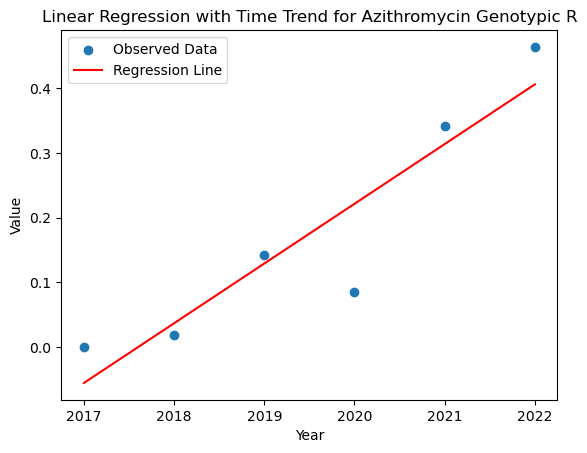

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YAziG_P_long_data[YAziG_P_long_data['Azithromycin_Geno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Azithromycin Genotypic {specific_st}')
plt.legend()
plt.show()


In [78]:
YAziP_P = pd.read_csv("12032023_Azi_P_Pro.csv")
YAziP_P_index= YAziP_P.set_index("Azithromycin_Pheno")
YAziP_P_long_data = melted_df = YAziP_P_index.reset_index().melt(id_vars='Azithromycin_Pheno', var_name='Year', value_name='Value')
YAziP_P_long_data


,Azithromycin_Pheno,Year,Value
0,R,2017,0.012821
1,R,2018,0.008772
2,R,2019,0.025210
3,R,2020,0.000000
4,R,2021,0.073171
5,R,2022,0.035714


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     1.959
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.234
Time:                        16:08:33   Log-Likelihood:                 15.051
No. Observations:                   6   AIC:                            -26.10
Df Residuals:                       4   BIC:                            -26.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2717     11.643     -1.398      0.2

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


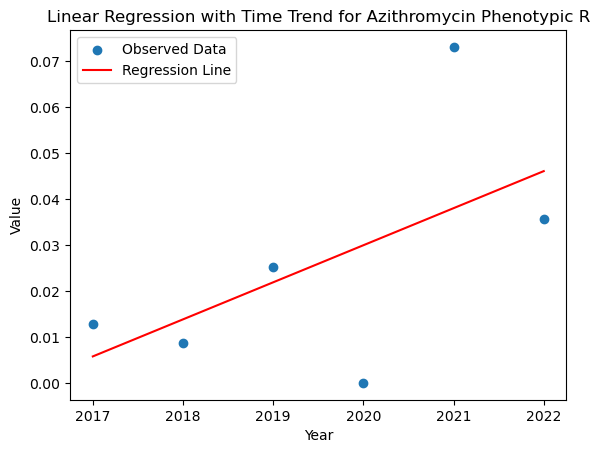

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YAziP_P_long_data[YAziP_P_long_data['Azithromycin_Pheno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Azithromycin Phenotypic {specific_st}')
plt.legend()
plt.show()

In [81]:
Ybeta_P = pd.read_csv("12032023_beta_Pro.csv")
Ybeta_P_index= Ybeta_P.set_index("BetaNLactamase")
Ybeta_P_long_data = melted_df = Ybeta_P_index.reset_index().melt(id_vars='BetaNLactamase', var_name='Year', value_name='Value')
Ybeta_P_long_data

,BetaNLactamase,Year,Value
0,P,2017,0.000000
1,P,2018,0.026316
2,P,2019,0.016807
3,P,2020,0.000000
4,P,2021,0.000000
5,P,2022,0.035714


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                 -0.149
Method:                 Least Squares   F-statistic:                    0.3510
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.585
Time:                        16:11:17   Log-Likelihood:                 17.254
No. Observations:                   6   AIC:                            -30.51
Df Residuals:                       4   BIC:                            -30.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7654      8.066     -0.591      0.5

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


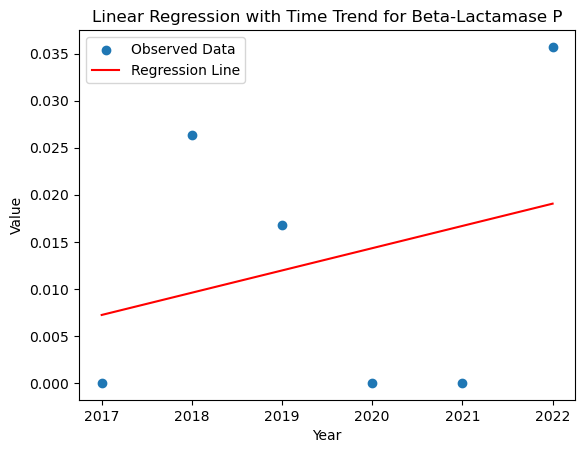

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'P'

# Filter data for the specific ST
specific_data = Ybeta_P_long_data[Ybeta_P_long_data['BetaNLactamase'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Beta-Lactamase {specific_st}')
plt.legend()
plt.show()

In [83]:
Ycef_P = pd.read_csv("12032023_Cef_G_Pro.csv")
Ycef_P_index= Ycef_P.set_index("Cefixime_Geno")
Ycef_P_long_data = melted_df = Ycef_P_index.reset_index().melt(id_vars='Cefixime_Geno', var_name='Year', value_name='Value')
Ycef_P_long_data

,Cefixime_Geno,Year,Value
0,R,2017,0.320513
1,R,2018,0.157895
2,R,2019,0.168067
3,R,2020,0.191489
4,R,2021,0.146341
5,R,2022,0.107143


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     6.434
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0642
Time:                        16:14:33   Log-Likelihood:                 10.582
No. Observations:                   6   AIC:                            -17.16
Df Residuals:                       4   BIC:                            -17.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3876     24.523      2.544      0.0

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


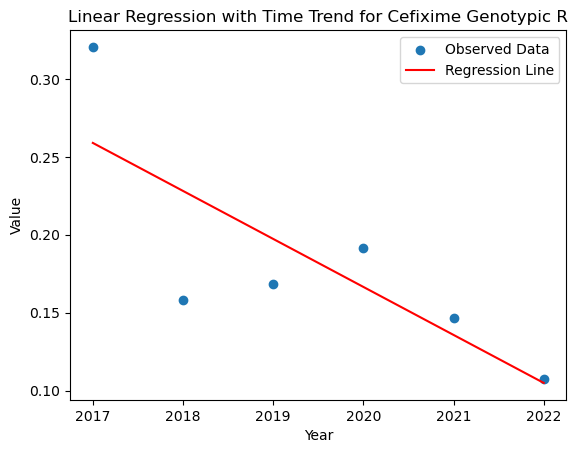

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = Ycef_P_long_data[Ycef_P_long_data['Cefixime_Geno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Cefixime Genotypic {specific_st}')
plt.legend()
plt.show()

In [85]:
YcipG_P = pd.read_csv("12032023_Cipro_G_Pro.csv")
YcipG_P_index= YcipG_P.set_index("Ciprofloxacin_Geno")
YcipG_P_long_data = melted_df = YcipG_P_index.reset_index().melt(id_vars='Ciprofloxacin_Geno', var_name='Year', value_name='Value')
YcipG_P_long_data

,Ciprofloxacin_Geno,Year,Value
0,R,2017,0.346154
1,R,2018,0.201754
2,R,2019,0.277311
3,R,2020,0.276596
4,R,2021,0.512195
5,R,2022,0.642857


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     5.804
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0736
Time:                        16:17:22   Log-Likelihood:                 5.4359
No. Observations:                   6   AIC:                            -6.872
Df Residuals:                       4   BIC:                            -7.288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -138.9188     57.818     -2.403      0.0

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


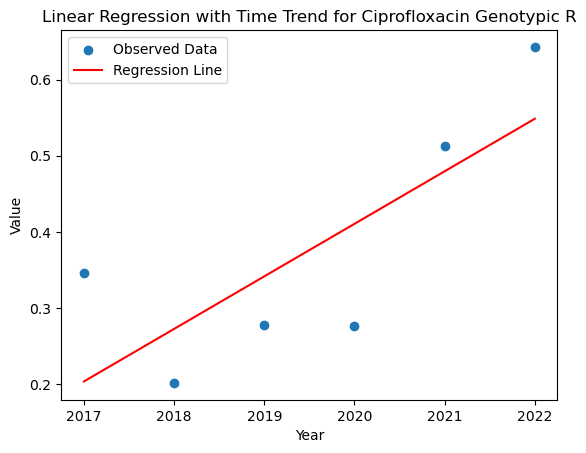

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YcipG_P_long_data[YcipG_P_long_data['Ciprofloxacin_Geno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Ciprofloxacin Genotypic {specific_st}')
plt.legend()
plt.show()

In [87]:
YcipP_P = pd.read_csv("12032023_Cipro_P_Pro.csv")
YcipP_P_index= YcipP_P.set_index("Ciprofloxacin_Pheno")
YcipP_P_long_data = melted_df = YcipP_P_index.reset_index().melt(id_vars='Ciprofloxacin_Pheno', var_name='Year', value_name='Value')
YcipP_P_long_data

,Ciprofloxacin_Pheno,Year,Value
0,R,2017,0.333333
1,R,2018,0.192982
2,R,2019,0.260504
3,R,2020,0.276596
4,R,2021,0.487805
5,R,2022,0.642857


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     6.117
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0687
Time:                        16:19:10   Log-Likelihood:                 5.5095
No. Observations:                   6   AIC:                            -7.019
Df Residuals:                       4   BIC:                            -7.435
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -140.8942     57.114     -2.467      0.0

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


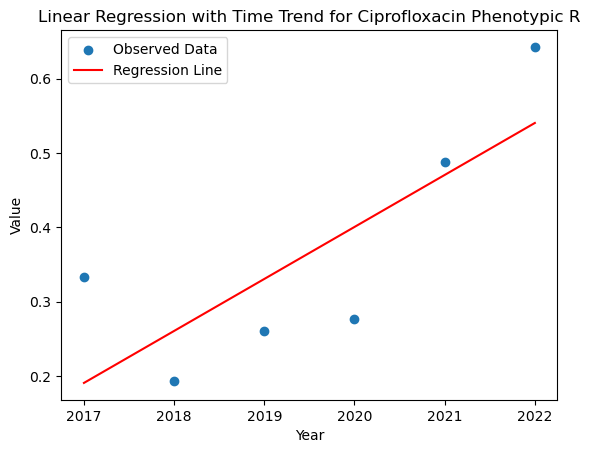

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YcipP_P_long_data[YcipP_P_long_data['Ciprofloxacin_Pheno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Ciprofloxacin Phenotypic {specific_st}')
plt.legend()
plt.show()

In [90]:
Yery_P = pd.read_csv("12032023_Ery_P_Pro.csv")
Yery_P_index= Yery_P.set_index("Erythromycin_Pheno")
Yery_P_long_data = melted_df = Yery_P_index.reset_index().melt(id_vars='Erythromycin_Pheno', var_name='Year', value_name='Value')
Yery_P_long_data

,Erythromycin_Pheno,Year,Value
0,R,2018,0.131579
1,R,2019,0.159664
2,R,2020,0.170213
3,R,2021,0.219512
4,R,2022,0.285714


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     35.34
Date:                Sun, 03 Dec 2023   Prob (F-statistic):            0.00952
Time:                        16:22:03   Log-Likelihood:                 13.848
No. Observations:                   5   AIC:                            -23.70
Df Residuals:                       3   BIC:                            -24.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -74.1667     12.508     -5.930      0.0

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


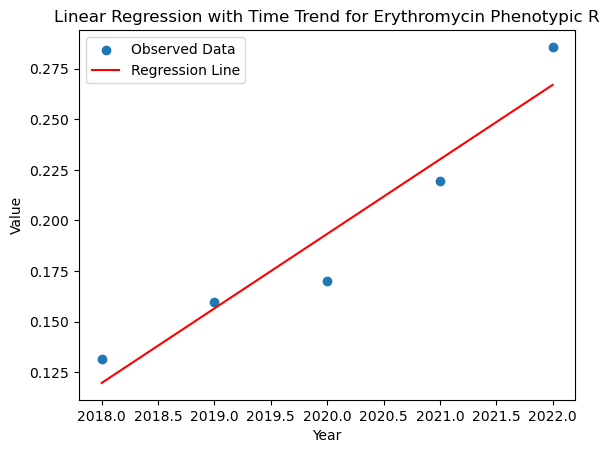

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = Yery_P_long_data[Yery_P_long_data['Erythromycin_Pheno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Erythromycin Phenotypic {specific_st}')
plt.legend()
plt.show()

In [93]:
YpenG_P = pd.read_csv("12032023_Pen_G_Pro.csv")
YpenG_P_index= YpenG_P.set_index("Penicillin_Geno")
YpenG_P_long_data = melted_df = YpenG_P_index.reset_index().melt(id_vars='Penicillin_Geno', var_name='Year', value_name='Value')
YpenG_P_long_data

,Penicillin_Geno,Year,Value
0,R,2017,0.320513
1,R,2018,0.157895
2,R,2019,0.126050
3,R,2020,0.085106
4,R,2021,0.048780
5,R,2022,0.035714


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     21.11
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0101
Time:                        16:25:27   Log-Likelihood:                 11.097
No. Observations:                   6   AIC:                            -18.19
Df Residuals:                       4   BIC:                            -18.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5435     22.508      4.600      0.0

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


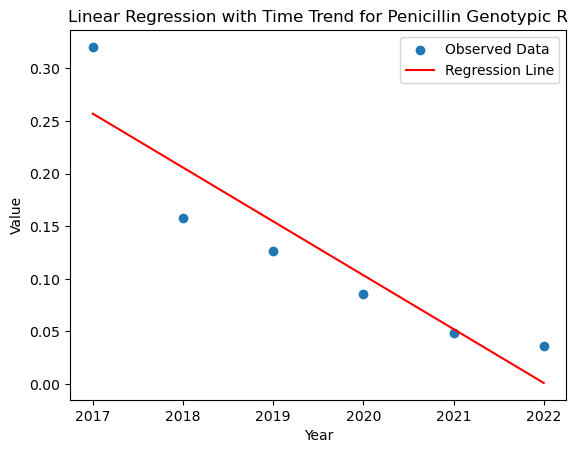

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YpenG_P_long_data[YpenG_P_long_data['Penicillin_Geno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Penicillin Genotypic {specific_st}')
plt.legend()
plt.show()

In [96]:
YpenP_P = pd.read_csv("12032023_Pen_P_Pro.csv")
YpenP_P_index= YpenP_P.set_index("Penicillin_Pheno")
YpenP_P_long_data = melted_df = YpenP_P_index.reset_index().melt(id_vars='Penicillin_Pheno', var_name='Year', value_name='Value')
YpenP_P_long_data

,Penicillin_Pheno,Year,Value
0,R,2017,0.115385
1,R,2018,0.096491
2,R,2019,0.016807
3,R,2020,0.042553
4,R,2021,0.024390
5,R,2022,0.071429


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     1.732
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.258
Time:                        16:27:08   Log-Likelihood:                 12.441
No. Observations:                   6   AIC:                            -20.88
Df Residuals:                       4   BIC:                            -21.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.7376     17.989      1.320      0.2

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


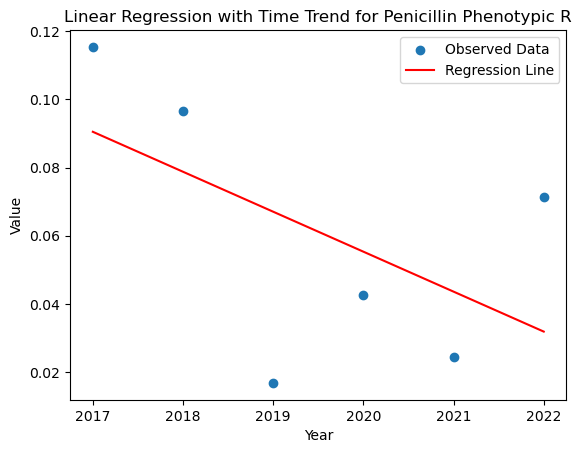

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YpenP_P_long_data[YpenP_P_long_data['Penicillin_Pheno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Penicillin Phenotypic {specific_st}')
plt.legend()
plt.show()

In [98]:
import pandas as pd

# Assuming 'your_table_list' is a list containing your DataFrames
# Replace it with the actual list of your DataFrames
your_table_list = [YsulG]  # Read your CSV files or use your existing DataFrames

# Define the year columns and their divisors
year_columns = ['2017', '2018', '2019', '2020', '2021', '2022']
divisors = {'2017': 78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, '2022': 28}

# Dictionary to store results for each table
results_dict = {}

# Iterate over the tables
for table in your_table_list:
    # Extract 'R' rows
    r_rows = table.loc[table.index == 'R'].copy()

    # Divide each 'R' row by its respective divisor in each year column
    for year, divisor in divisors.items():
        r_rows[year] /= divisor

    # Store the result in the dictionary
    results_dict['table_' + str(len(results_dict) + 1)] = r_rows

for table_name, result_df in results_dict.items():
    result_df.to_csv(f"{table_name}_result.csv", index=True)
# Display the results
for table_name, result_df in results_dict.items():
    print(f"\n{table_name}:\n{result_df}")



table_1:
Year                   2017      2018  2019  2020  2021  2022
Sulfanomides_Geno                                            
R                  0.974359  0.973684   1.0   1.0   1.0   1.0


In [99]:
Ysul_P = pd.read_csv("12032023_Sul_Pro.csv")
Ysul_P_index= Ysul_P.set_index("Sulfanomides_Geno")
Ysul_P_long_data = melted_df = Ysul_P_index.reset_index().melt(id_vars='Sulfanomides_Geno', var_name='Year', value_name='Value')
Ysul_P_long_data

,Sulfanomides_Geno,Year,Value
0,R,2017,0.974359
1,R,2018,0.973684
2,R,2019,1.000000
3,R,2020,1.000000
4,R,2021,1.000000
5,R,2022,1.000000


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     8.543
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0431
Time:                        16:32:00   Log-Likelihood:                 21.329
No. Observations:                   6   AIC:                            -38.66
Df Residuals:                       4   BIC:                            -39.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.9614      4.089     -2.680      0.0

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


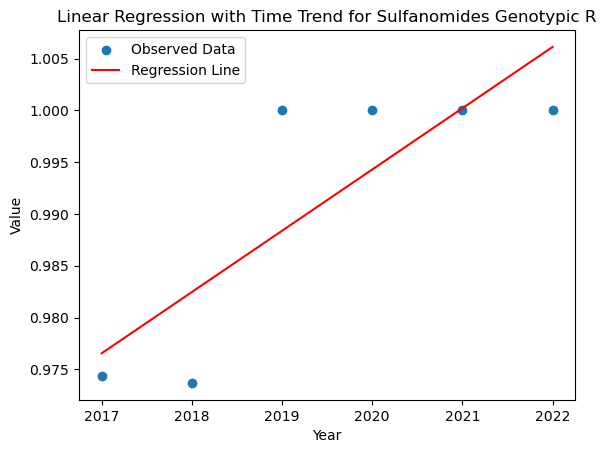

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = Ysul_P_long_data[Ysul_P_long_data['Sulfanomides_Geno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Sulfanomides Genotypic {specific_st}')
plt.legend()
plt.show()

In [101]:
YtetG_P = pd.read_csv("12032023_tet_G_Pro.csv")
YtetG_P_index= YtetG_P.set_index("Tetracycline_Geno")
YtetG_P_long_data = melted_df = YtetG_P_index.reset_index().melt(id_vars='Tetracycline_Geno', var_name='Year', value_name='Value')
YtetG_P_long_data

,Tetracycline_Geno,Year,Value
0,R,2017,0.358974
1,R,2018,0.605263
2,R,2019,0.554622
3,R,2020,0.404255
4,R,2021,0.292683
5,R,2022,0.214286


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     2.811
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.169
Time:                        16:34:33   Log-Likelihood:                 4.9836
No. Observations:                   6   AIC:                            -5.967
Df Residuals:                       4   BIC:                            -6.384
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9315     62.346      1.683      0.1

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


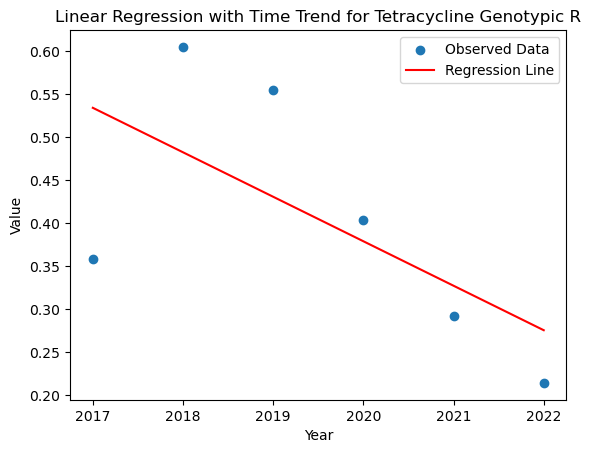

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YtetG_P_long_data[YtetG_P_long_data['Tetracycline_Geno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Tetracycline Genotypic {specific_st}')
plt.legend()
plt.show()

In [103]:
YtetP_P = pd.read_csv("12032023_Tet_P_Pro.csv")
YtetP_P_index= YtetP_P.set_index("Tetracycline_Pheno")
YtetP_P_long_data = melted_df = YtetP_P_index.reset_index().melt(id_vars='Tetracycline_Pheno', var_name='Year', value_name='Value')
YtetP_P_long_data

,Tetracycline_Pheno,Year,Value
0,R,2017,0.589744
1,R,2018,0.710526
2,R,2019,0.621849
3,R,2020,0.553191
4,R,2021,0.536585
5,R,2022,0.428571


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     6.834
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0592
Time:                        16:36:16   Log-Likelihood:                 9.2108
No. Observations:                   6   AIC:                            -14.42
Df Residuals:                       4   BIC:                            -14.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.1423     30.820      2.633      0.0

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


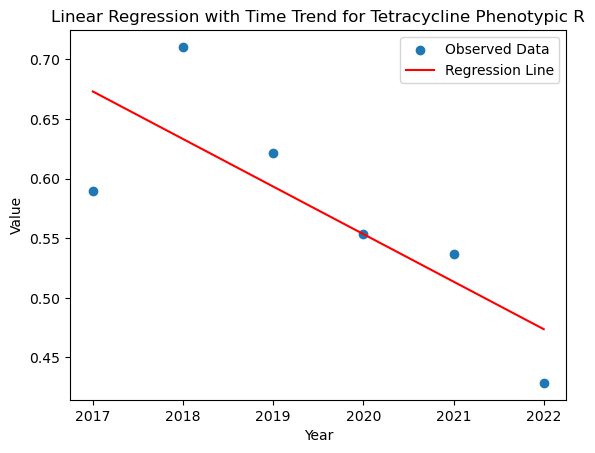

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YtetP_P_long_data[YtetP_P_long_data['Tetracycline_Pheno'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Tetracycline Phenotypic {specific_st}')
plt.legend()
plt.show()

In [6]:
geno = pd.read_csv("12172023_AMR_Genotype.csv", sep="\t")
pheno = pd.read_csv("12172023_AMR_Phenotype.csv", sep="\t")

In [11]:
pheno

,2017 (n=78),2018 (n=114),2019 (n=119),2020 (n=47),2021 (n=41),2022 (n=28)
Antibiotic,,,,,,
Azithromycin,1,1,3,0,3,1
Beta-lactamase,0,3,2,0,0,1
Cefixime,0,0,0,0,0,0
Ceftriaxone,0,0,0,0,0,0
Ciprofloxacin,26,22,31,13,20,18
Ertapenem,0,0,0,0,0,0
Erythromycin,0,15,19,8,9,8
Gentamicin,0,0,0,0,0,0
Penicillin,9,11,2,2,1,2


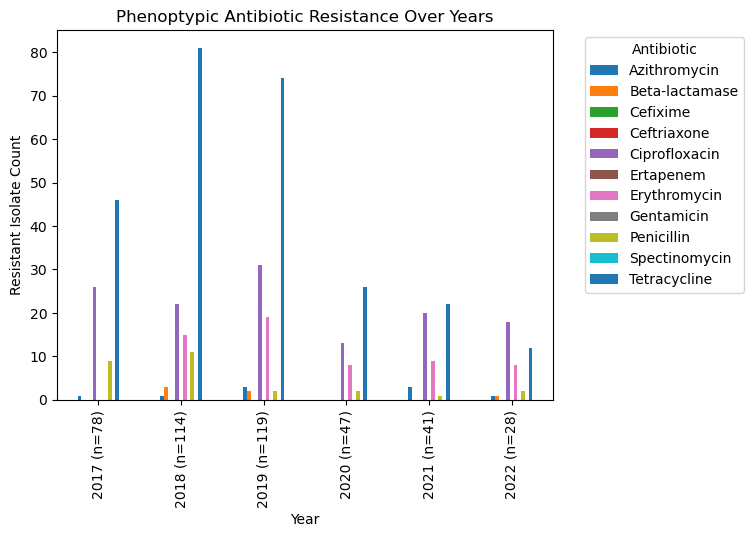

In [15]:
# Set 'Antibiotic' as the index for easier plotting
import pandas as pd
import matplotlib.pyplot as plt
# Transpose the DataFrame to have 'Antibiotic' as columns
df_transposed = pheno.T

# Plotting separate bars for each antibiotic in each year
df_transposed.plot(kind='bar', stacked=False)

plt.xlabel('Year')
plt.ylabel('Resistant Isolate Count')
plt.title('Phenoptypic Antibiotic Resistance Over Years')
plt.legend(title='Antibiotic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [17]:
geno = geno.set_index("Antibiotic")

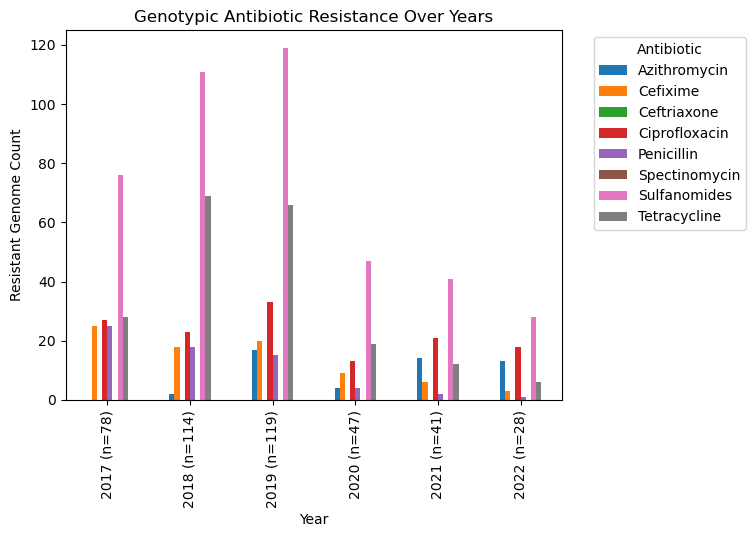

In [20]:
# Set 'Antibiotic' as the index for easier plotting
import pandas as pd
import matplotlib.pyplot as plt
# Transpose the DataFrame to have 'Antibiotic' as columns
df_transposed = geno.T

# Plotting separate bars for each antibiotic in each year
df_transposed.plot(kind='bar', stacked=False)

plt.xlabel('Year')
plt.ylabel('Resistant Genome Count')
plt.title('Genotypic Antibiotic Resistance Over Years')
plt.legend(title='Antibiotic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
pheno_all = pd.read_csv("/media/haley/My Book/Gonorrhea_Jo-Anne/12282023_Sask_Data_2003-2022_Pheno_AMR.csv")

In [22]:
pheno_all['Year'] = pheno_all['NCBI-NAME'].str.extract(r'(\d{4})')

In [23]:
data_columns = pheno_all.columns.difference(['Year'])

# Create a dictionary to store the results for each column
grouped_counts_dict = {}

# Iterate over columns and count unique values for each year
for column in data_columns:
    grouped_counts_dict[column] = pheno_all.groupby(['Year', column]).size().unstack().fillna(0).astype(int)

# Display the grouped counts for each column
for column, counts in grouped_counts_dict.items():
    print(f"\nCounts for {column}:\n{counts}")


Counts for Azithromycin_Classification:
Azithromycin_Classification  R    S
Year                               
2003                         0   60
2004                         1   58
2005                         0   52
2006                         0   55
2007                         1   52
2008                         0   41
2009                         0   34
2010                         8   21
2011                         1   30
2012                         0   50
2013                         5   64
2014                         0   89
2015                         0   63
2017                         1   75
2018                         1  126
2019                         3  116
2020                         0   48
2021                         3   38
2022                         1   27

Counts for Beta_Lactamase:
Beta_Lactamase    N  P
Year                  
2003             60  0
2004             59  0
2005             52  0
2006             55  0
2007             53  0
2008          

In [38]:
R_all = pd.read_csv("12282023_Sask_2003-2022_PhenotypicR.csv", sep="\t")

In [43]:
R=R_all.set_index("Antibiotic")

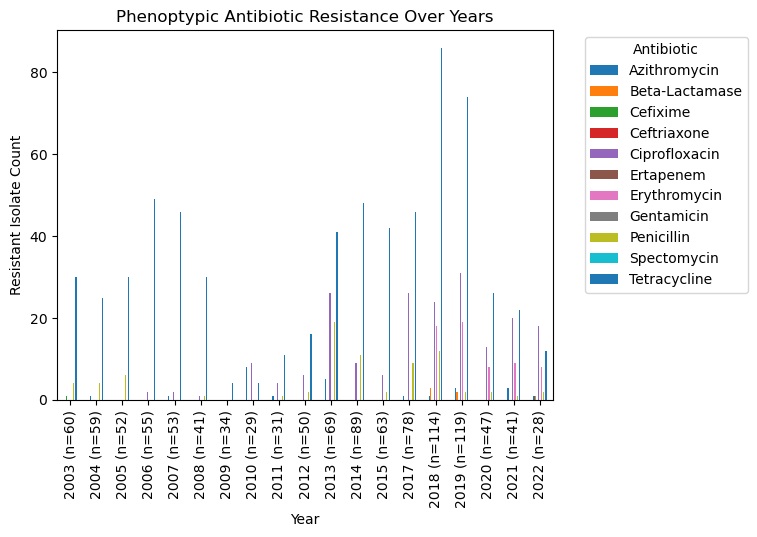

In [44]:
# Set 'Antibiotic' as the index for easier plotting
import pandas as pd
import matplotlib.pyplot as plt
# Transpose the DataFrame to have 'Antibiotic' as columns

df_transposed = R.T
# Plotting separate bars for each antibiotic in each year
df_transposed.plot(kind='bar', stacked=False)

plt.xlabel('Year')
plt.ylabel('Resistant Isolate Count')
plt.title('Phenoptypic Antibiotic Resistance Over Years')
plt.legend(title='Antibiotic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [47]:
pheno_all.head()

,NCBI-NAME,Penicillin_Classification,Spectinomycin_Classification,Tetracycline_Classification,Erythromycin_Classification,Ceftriaxone_Classification,Ciprofloxacin_Classification,Cefixime_Classification,Azithromycin_Classification,Gentamicin_Classification,Ertapenem_Classification,Beta_Lactamase,Year
0,NG-1-2018,I,S,R,S,S,S,S,S,I,S,N,2018
1,NG-2-2018,I,S,R,S,S,S,S,S,I,S,N,2018
2,NG-3-2018,I,S,I,S,S,R,S,S,I,S,N,2018
3,NG-4-2018,I,S,I,S,S,R,S,S,I,S,N,2018
4,NG-5-2018,R,S,R,R,S,R,S,S,I,S,N,2018


In [53]:
YAziR=pd.crosstab(pheno_all['Azithromycin_Classification'], pheno_all['Year'])
YbetaR=pd.crosstab(pheno_all['Beta_Lactamase'], pheno_all['Year'])
YcefR=pd.crosstab(pheno_all['Cefixime_Classification'], pheno_all['Year'])
YciproR=pd.crosstab(pheno_all['Ciprofloxacin_Classification'], pheno_all['Year'])
YpenR=pd.crosstab(pheno_all['Penicillin_Classification'], pheno_all['Year'])
YtetR=pd.crosstab(pheno_all['Tetracycline_Classification'], pheno_all['Year'])

In [57]:
import pandas as pd

# Assuming 'your_table_list' is a list containing your DataFrames
# Replace it with the actual list of your DataFrames
your_table_list = [ YcefR, YciproR, YpenR, YtetR]  # Read your CSV files or use your existing DataFrames

# Define the year columns and their divisors
year_columns = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2017','2018', '2019', '2020', '2021', '2022']
divisors = {'2003':60, '2004':59, '2005':52, '2006':55, '2007':53, '2008':41, '2009':34, '2010':29, '2011':31, '2012':50, '2013':69, '2014':89, '2015':63, '2017':78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, '2022': 28}

# Dictionary to store results for each table
results_dict = {}

# Iterate over the tables
for table in your_table_list:
    # Extract 'R' rows
    r_rows = table.loc[table.index == 'R'].copy()

    # Divide each 'R' row by its respective divisor in each year column
    for year, divisor in divisors.items():
        r_rows[year] /= divisor

    # Store the result in the dictionary
    results_dict['table_' + str(len(results_dict) + 1)] = r_rows

for table_name, result_df in results_dict.items():
    result_df.to_csv(f"{table_name}_result.csv", index=True)
# Display the results
for table_name, result_df in results_dict.items():
    print(f"\n{table_name}:\n{result_df}")


table_1:
Year                         2003  2004  2005  2006  2007  2008  2009  2010  \
Cefixime_Classification                                                       
R                        0.016667   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Year                     2011  2012  2013  2014  2015  2017  2018  2019  2020  \
Cefixime_Classification                                                         
R                         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Year                     2021  2022  
Cefixime_Classification              
R                         0.0   0.0  

table_2:
Year                          2003  2004  2005      2006      2007     2008  \
Ciprofloxacin_Classification                                                  
R                              0.0   0.0   0.0  0.036364  0.037736  0.02439   

Year                          2009      2010      2011  2012      2013  \
Ciprofloxacin_Classification                                            

In [56]:
import pandas as pd

# Assuming 'your_table_list' is a list containing your DataFrames
# Replace it with the actual list of your DataFrames
your_table_list = [YbetaR]  # Read your CSV files or use your existing DataFrames

# Define the year columns and their divisors
year_columns = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2017','2018', '2019', '2020', '2021', '2022']
divisors = {'2003':60, '2004':59, '2005':52, '2006':55, '2007':53, '2008':41, '2009':34, '2010':29, '2011':31, '2012':50, '2013':69, '2014':89, '2015':63, '2017':78, '2018': 114, '2019': 119, '2020': 47, '2021': 41, '2022': 28}


# Dictionary to store results for each table
results_dict = {}

# Iterate over the tables
for table in your_table_list:
    # Extract 'R' rows
    r_rows = table.loc[table.index == 'P'].copy()

    # Divide each 'R' row by its respective divisor in each year column
    for year, divisor in divisors.items():
        r_rows[year] /= divisor

    # Store the result in the dictionary
    results_dict['table_' + str(len(results_dict) + 1)] = r_rows

for table_name, result_df in results_dict.items():
    result_df.to_csv(f"{table_name}_result.csv", index=True)
# Display the results
for table_name, result_df in results_dict.items():
    print(f"\n{table_name}:\n{result_df}")


table_1:
Year            2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Beta_Lactamase                                                               
P                0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Year            2013  2014  2015  2017      2018      2019  2020  2021  \
Beta_Lactamase                                                           
P                0.0   0.0   0.0   0.0  0.026316  0.016807   0.0   0.0   

Year                2022  
Beta_Lactamase            
P               0.035714  


In [58]:
YAziR = pd.read_csv("/media/haley/My Book/Gonorrhea_Jo-Anne/YAziR.csv")
YbetaR = pd.read_csv("/media/haley/My Book/Gonorrhea_Jo-Anne/YbetaR.csv")
YcefR = pd. read_csv("/media/haley/My Book/Gonorrhea_Jo-Anne/YcefR.csv")
YciproR = pd.read_csv("/media/haley/My Book/Gonorrhea_Jo-Anne/YciproR.csv")
YPenR = pd.read_csv("/media/haley/My Book/Gonorrhea_Jo-Anne/YPenR.csv")
YTetR = pd.read_csv("/media/haley/My Book/Gonorrhea_Jo-Anne/YTetR.csv")

In [59]:
YAziR_long_data = melted_df = YAziR.reset_index().melt(id_vars='Azithromycin_Classification', var_name='Year', value_name='Value')
YbetaR_long_data = melted_df = YbetaR.reset_index().melt(id_vars='Beta_Lactamase', var_name='Year', value_name='Value')
YcefR_long_data = melted_df = YcefR.reset_index().melt(id_vars='Cefixime_Classification', var_name='Year', value_name='Value')
YciproR_long_data = melted_df = YciproR.reset_index().melt(id_vars='Ciprofloxacin_Classification', var_name='Year', value_name='Value')
YPenR_long_data = melted_df = YPenR.reset_index().melt(id_vars='Penicillin_Classification', var_name='Year', value_name='Value')
YTetR_long_data = melted_df = YTetR.reset_index().melt(id_vars='Tetracycline_Classification', var_name='Year', value_name='Value')

In [63]:
YAziR_long_data = YAziR_long_data.drop(0, axis=0)

YbetaR_long_data = YbetaR_long_data.drop(0, axis=0)

YcefR_long_data = YcefR_long_data.drop(0, axis=0)

YciproR_long_data = YciproR_long_data.drop(0, axis=0)

YPenR_long_data = YPenR_long_data.drop(0, axis=0)

YTetR_long_data = YTetR_long_data.drop(0, axis=0)


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                  0.002851
Date:                Thu, 28 Dec 2023   Prob (F-statistic):              0.958
Time:                        18:21:47   Log-Likelihood:                 3.2149
No. Observations:                  19   AIC:                            -2.430
Df Residuals:                      17   BIC:                           -0.5409
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3717     17.020     -0.022      0.9

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


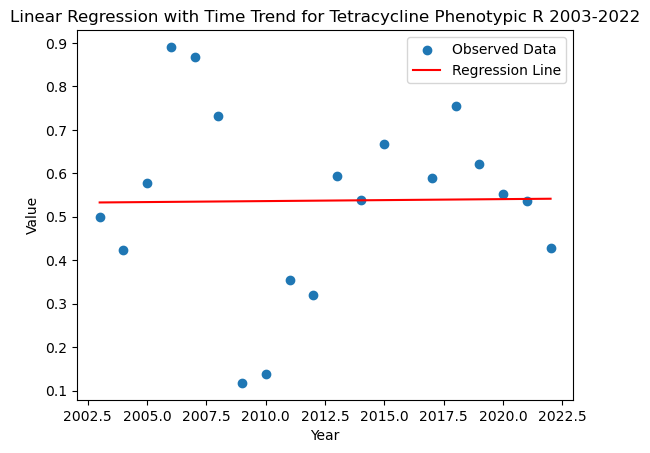

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YTetR_long_data[YTetR_long_data['Tetracycline_Classification'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Tetracycline Phenotypic {specific_st} 2003-2022')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                    0.1978
Date:                Thu, 28 Dec 2023   Prob (F-statistic):              0.662
Time:                        18:23:18   Log-Likelihood:                 25.127
No. Observations:                  19   AIC:                            -46.25
Df Residuals:                      17   BIC:                            -44.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3283      5.372     -0.433      0.6

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


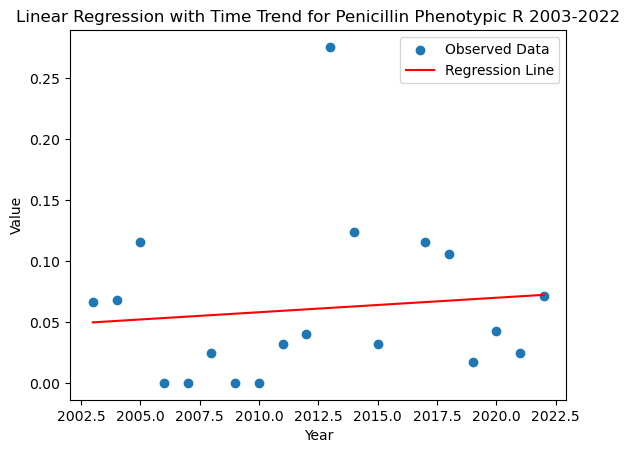

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YPenR_long_data[YPenR_long_data['Penicillin_Classification'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Penicillin Phenotypic {specific_st} 2003-2022')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     29.07
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           4.87e-05
Time:                        18:24:45   Log-Likelihood:                -61.718
No. Observations:                  19   AIC:                             127.4
Df Residuals:                      17   BIC:                             129.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2787.8712    519.026     -5.371      0.0

/tmp/ipykernel_26555/2819440593.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_26555/2819440593.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Value'] = specific_data['Value'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... c

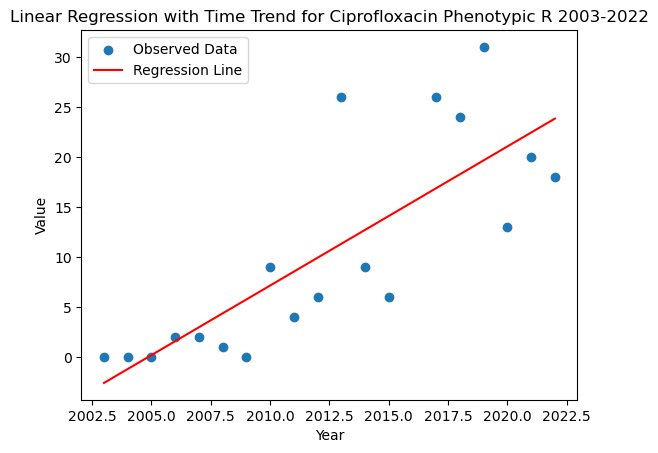

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YciproR_long_data[YciproR_long_data['Ciprofloxacin_Classification'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Ciprofloxacin Phenotypic {specific_st} 2003-2022')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.778
Date:                Thu, 28 Dec 2023   Prob (F-statistic):              0.114
Time:                        18:26:00   Log-Likelihood:                 80.757
No. Observations:                  19   AIC:                            -157.5
Df Residuals:                      17   BIC:                            -155.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4800      0.287      1.670      0.1

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


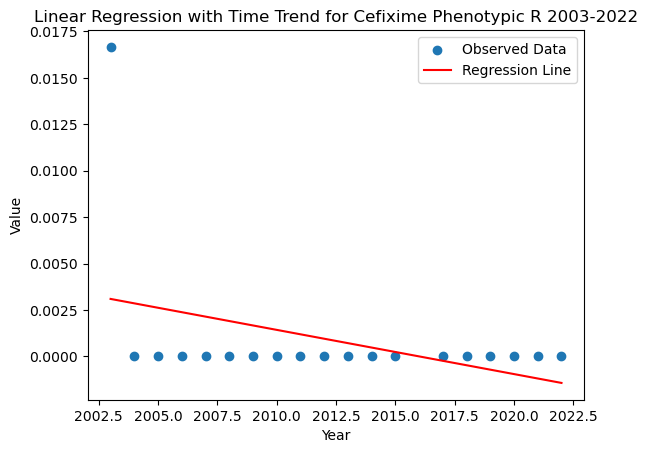

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YcefR_long_data[YcefR_long_data['Cefixime_Classification'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Cefixime Phenotypic {specific_st} 2003-2022')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     7.097
Date:                Thu, 28 Dec 2023   Prob (F-statistic):             0.0164
Time:                        18:27:26   Log-Likelihood:                 63.737
No. Observations:                  19   AIC:                            -123.5
Df Residuals:                      17   BIC:                            -121.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8714      0.704     -2.658      0.0

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


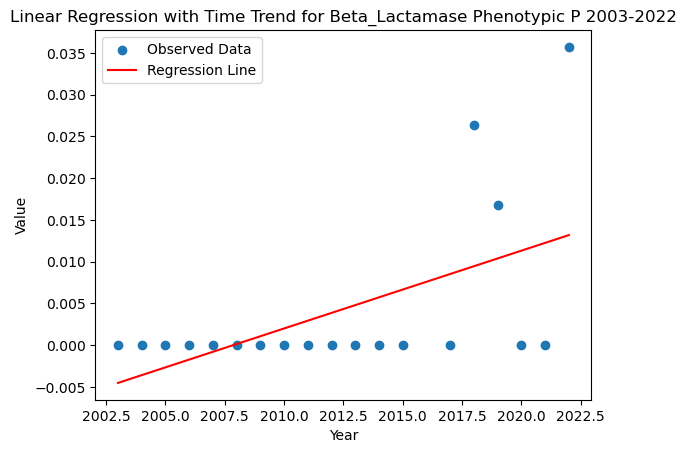

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'P'

# Filter data for the specific ST
specific_data = YbetaR_long_data[YbetaR_long_data['Beta_Lactamase'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Beta_Lactamase Phenotypic {specific_st} 2003-2022')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                   0.05336
Date:                Thu, 28 Dec 2023   Prob (F-statistic):              0.820
Time:                        18:28:41   Log-Likelihood:                 25.865
No. Observations:                  19   AIC:                            -47.73
Df Residuals:                      17   BIC:                            -45.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1634      5.167     -0.225      0.8

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


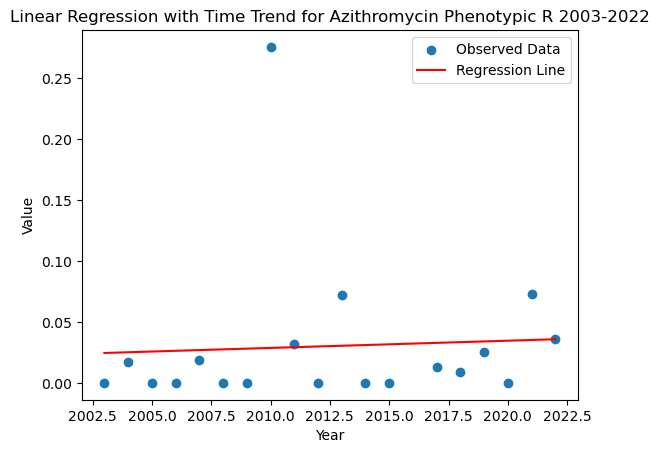

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with columns 'Year', 'ST', and 'Proportion'

# Specify the specific ST you're interested in
specific_st = 'R'

# Filter data for the specific ST
specific_data = YAziR_long_data[YAziR_long_data['Azithromycin_Classification'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Value'] = specific_data['Value'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Value']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Value'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Linear Regression with Time Trend for Azithromycin Phenotypic {specific_st} 2003-2022')
plt.legend()
plt.show()